In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [15]:
#Load in Combined data
data = pd.read_csv("/Users/carternorton/repo/Research/FS_TMB_Ca/Clean_Data.csv", index_col=0)

In [ ]:
data.columns

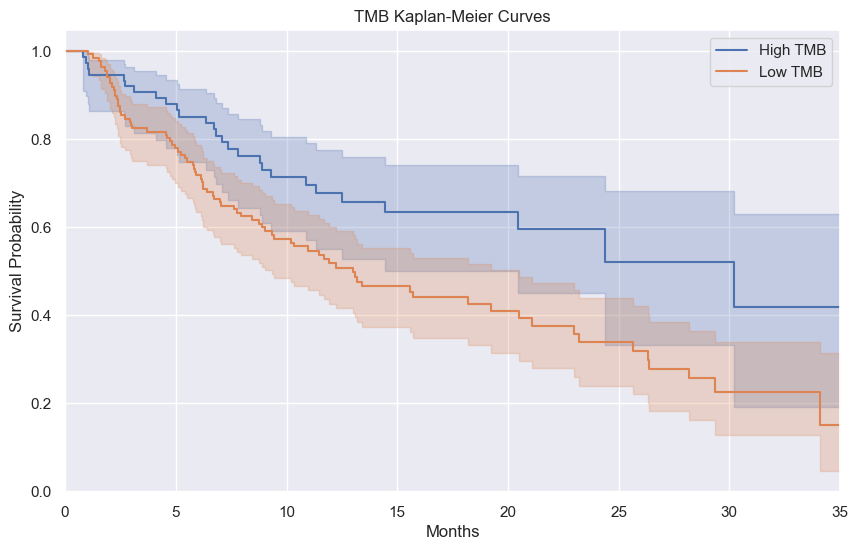

In [43]:
#Let's do a kaplan meier curve for the overall survival time for patients with TMB-H and TMB-L
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

sb.set()

#Let's create a KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Separate patients into high and low TMB groups
high_tmb = data[data['TMB'] == "TMB-H"]  # Replace 'threshold' with your desired TMB threshold
low_tmb = data[data['TMB'] == "TMB-L"]  # Replace 'threshold' with your desired TMB threshold

# Create Kaplan-Meier fitters for high and low TMB groups
kmf_high = KaplanMeierFitter()
kmf_low = KaplanMeierFitter()

# Fit the survival data for high and low TMB groups
kmf_high.fit(high_tmb['OS_Length'], event_observed=high_tmb['OS (0: Alive, 1: Expired/Hospice)'])
kmf_low.fit(low_tmb['OS_Length'], event_observed=low_tmb['OS (0: Alive, 1: Expired/Hospice)'])

# Plot the Kaplan-Meier curves
plt.figure(figsize=(10, 6))
kmf_high.plot(label='High TMB')
kmf_low.plot(label='Low TMB')
plt.xlabel('Months')
plt.ylabel('Survival Probability')
plt.title('TMB Kaplan-Meier Curves')
plt.xlim(0, 35)
plt.legend()
plt.savefig('/Users/carternorton/repo/Research/FS_TMB_Ca/Figures/TMB_KM.png')
plt.show()




In [48]:
data["12_week_response"].value_counts()
data["tx"].value_counts()

tx
mono    159
dual     53
Name: count, dtype: int64

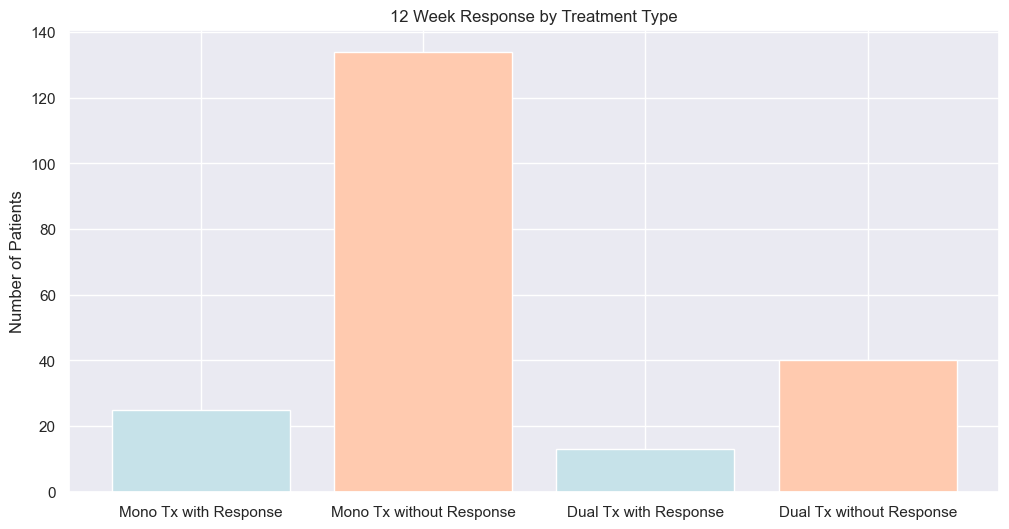

In [58]:
#Let's barchart the number of patients with "mono" "tx" with 12 week response, and without 12 week response
#Let's barchart the number of patients with "dual" "tx" with 12 week response, and without 12 week response

categories = ["Mono Tx with Response", "Mono Tx without Response", "Dual Tx with Response", "Dual Tx without Response"]
values = [len(data[(data['tx'] == "mono") & (data['12_week_response'] == "response")]), len(data[(data['tx'] == "mono") & (data['12_week_response'] == "no_response")]), len(data[(data['tx'] == "dual") & (data['12_week_response'] == "response")]), len(data[(data['tx'] == "dual") & (data['12_week_response'] == "no_response")])]
plt.figure(figsize=(12, 6))
plt.ylabel("Number of Patients")
plt.bar(categories, values, color=['#c6e2e9', '#ffcaaf', '#c6e2e9', '#ffcaaf'])
plt.title("12 Week Response by Treatment Type")
plt.savefig('/Users/carternorton/repo/Research/FS_TMB_Ca/Figures/tx_12_week_response.png')



